In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:Consolas;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red">ch10_N차원배열다루기_1절~3절</font>
    
- [numpy] (https://numpy.org/doc/stable/)
- [numpy_API] (https://numpy.org/doc/stable/reference/index.html#reference)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 c언어로 구현되어 고성능 수치 계산 패키지

# 1절 numpy(넘파이) 패키지

In [43]:
import numpy as np
np.__version__

'1.23.5'

In [44]:
# 배열 생성 함수
# np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
type(a), a

(numpy.ndarray,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

## 1.1. 배열속성

In [45]:
from numpy import arange

a = arange(15).reshape(3,5) #3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [46]:
type(a) # a변수의 타입

numpy.ndarray

In [47]:
a.dtype # a배열 요소의 type

dtype('int32')

In [48]:
a.dtype.name

'int32'

In [49]:
a.itemsize # 한 요소의 bytesize

4

In [50]:
a.ndim # 차원수(축수)

2

In [51]:
a.size # 배열 요소의 수

15

In [52]:
a.shape # 배열 구조의 (튜븦)

(3, 5)

## 1-2. 배열 변경(구조, 타입)

In [58]:
# 구조변경
print("구조변경 전", a, sep="\n")
a.shape = (5, 3)
print("구조변경 후", a, sep="\n")

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [60]:
# 타입변경 (x) - 이렇게 하면 안 된다.
 
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [61]:
a.dtype

dtype('int32')

In [63]:
a.itemsize

4

In [65]:
a.dtype = np.int64 # a배열을 읽을 떄 64bit씩 읽는다.
a.dtype

dtype('int64')

In [69]:
a.size, a.shape

(6, (3, 2))

In [70]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [88]:
# 타입변경 (O)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
a.astype(np.int64) # a.astype('int64') 같음

In [99]:
a = a.astype(np.int64)

In [100]:
a.astype('int64')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [101]:
a.dtype

dtype('int64')

In [102]:
a.itemsize

8

In [103]:
a.size, a.shape

(12, (3, 4))

In [104]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [105]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [106]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3. 배열저장

In [ ]:
# 배열 저장 - pkl , npy
# 딥러닝모델 저장 - h5(hdf5), keras
# 머신러닝 저장 - pkl , joblib

In [107]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [108]:
# 용량이 작은
import pickle
with open("data/ch10_a.pkl", "wb") as f:
    pickle.dump(a, f)

In [109]:
with open("data/ch10_a.pkl", 'rb') as f:
    load_a = pickle.load(f)

In [110]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [114]:
# a == load_a
np.all(a == load_a) # a 넘파이배열과 load_a 넘파이 배열이 같은지

True

In [115]:
# 용량이 큰
np.save("data/ch10_a.npy",a)

In [116]:
load_a2 = np.load('data/ch10_a.npy')
load_a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [117]:
np.all(load_a2 == a)

True

# 2절. 넘파이 배열

- array() 함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ons(), zeros(), empty()
- 랜덤값을 갖는 함수들...

## 2.1. array() 함수로 넘파이 배열 만들기

- np.array(list나 tuple, dtype=np.xxx, copy=T/F)

In [125]:
a = np.array([2,4,6], dtype=np.int8) # 정수의 기본 타입은 int32 / 실수의 기본타입은 float64
a

array([2, 4, 6], dtype=int8)

In [127]:
a[0], a[1], a[2]

(2, 4, 6)

In [129]:
a.dtype

dtype('int8')

In [133]:
b = np.array([[1.3, 2.4], [4, 5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [134]:
b.dtype

dtype('float64')

In [137]:
b = np.array([[1.3, 2.4], [4, 5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [138]:
b.itemsize

4

In [139]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [144]:
l = [[1, 2], [3.4, 4.5]]

for row in l:
#     print(row)
    for data in row:
        print(data, end="\t")
    print()

1	2	
3.4	4.5	


In [152]:
c = np.array([[1, 2], [3.4, 4.5]], dtype=np.float64)
c

array([[1. , 2. ],
       [3.4, 4.5]])

In [153]:
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행, {}열 {}".format(i, j, item), end='\t')
    

0행, 0열 1.0	0행, 1열 2.0	1행, 0열 3.4	1행, 1열 4.5	

In [159]:
c = np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [161]:
c[0, 3]

4

In [170]:
c[:,1:3]

array([[2, 3],
       [7, 8]], dtype=int16)

In [181]:
c[0, 2:5]

array([3, 4, 5], dtype=int16)

In [188]:
# 모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [187]:
# 모든행의 맨마지막 열을 제외한 호출
c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [200]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=False) # d = c , copy=False일 경우 c, d 가 같은 주소값을 참조, 얕은복사
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")
d[1,0] = 3333
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")

print('c주소 = {}, d주소 = {}'.format(id(c), id(d)))

c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
c = 
[[   1    2]
 [3333    4]]
d = 
[[   1    2]
 [3333    4]]
c주소 = 2183658780304, d주소 = 2183658780304


In [201]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=True) # copy=True 깊은복사
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")
d[1,0] = 3333
print('c = ',c, sep="\n")
print('d = ',d, sep="\n")

print('c주소 = {}, d주소 = {}'.format(id(c), id(d)))

c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
c = 
[[1 2]
 [3 4]]
d = 
[[   1    2]
 [3333    4]]
c주소 = 2183659436144, d주소 = 2183660083152


## 2.2. 기본값이 있는 배열 만들기

- np.zeros(tup) = np.zeros((256,256)) : 요소들이 다 0 
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 기본값 
- np.empty(tup) : 요소들이 임의의 값 (메모리 상태에 따라 달라짐)
```
※ 위의 함수를 이용해서, 생성된 배열은 기본 dtype이 float64. datype속성 따라 지정 가능
```

In [205]:
np.zeros((3, 5), dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [208]:
x = np.ones((3,5))

x.dtype,x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [217]:
f = np.full((3,5), -256, dtype=np.int32)
f.dtype, f

(dtype('int32'),
 array([[-256, -256, -256, -256, -256],
        [-256, -256, -256, -256, -256],
        [-256, -256, -256, -256, -256]]))

In [4]:
e = np.empty( (3,5) )
e

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## 2.3. 랜덤값을 갖는 배열 만들기

- 0 <= 난수 < 1
- np.random.random(tup) : 0부터 1미만의 **균등분포**를 갖는 랜덤값 (실수)
- np.random.uniform(low=0, hi=1.0, size=tup) : low부터 high미만의 **균등분포**를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균loc과 표준편자scale을 갖는 **정규분포** 랜덤값
- np.random.rand(n) : **균등분포**의 **1차원** 난수 배열 발생(난수 n개)
- np.random.randn(n) : **표준정규분포** (평균0, 표준편차1인 정규분포)의 **1차원** 난수 배열 발생 (난수 n개)

```
위의 것은 아래의 것과 틀림
cf. random.randint(n) : 0부터 n미만의 정수 난수 1개 발생
```

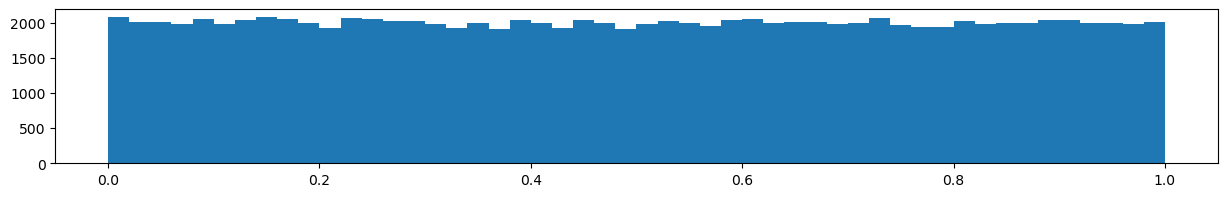

In [139]:
import matplotlib.pyplot as plt

x = np.random.rand(100000)
x
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=50)
plt.show()

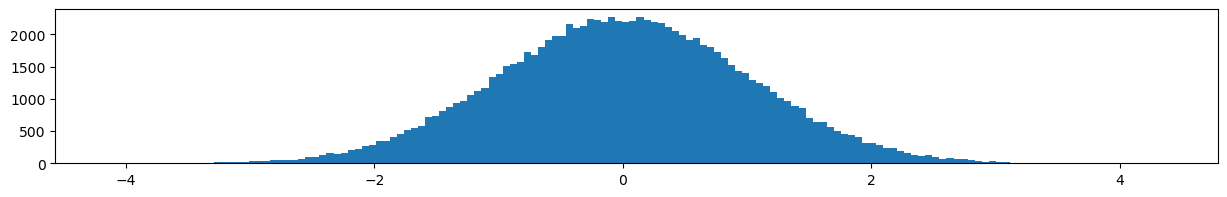

In [142]:
x = np.random.randn(100000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=150)
plt.show()

In [52]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) # 0부터 1미만의 랜덤 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [54]:
np.random.uniform(-1, 10, (2,5)) # -1 ~ 10 미나의 균등분포 난수 배열

array([[ 7.41016495, -0.77109222,  0.48731196,  0.27900319,  2.40887343],
       [ 6.3859791 ,  4.18352756,  7.97785128,  2.18545462,  7.06438575]])

In [56]:
np.random.normal(10, 2, (2,5)) # 평균 10, 표준편차 2인 정규분포 난수 배열

array([[ 5.56293011,  8.70513844,  8.94319136,  9.92158165, 10.4299519 ],
       [ 9.23128239,  9.49219184, 10.14650415,  8.00559233,  8.57228742]])

## 2.4. 연속된 값을 갖는 배열 만들기

- np.arange(from, stop, step, dtype) : from 부터 stop 앞까지 step 씩 증감하는 정수 배열
- np.linspace(from, to, count) : from 부터 to 까지(to포함) count개 숫자를 1차원 배열

In [65]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [80]:
# linspace 는 많은 수의 점들을 생성
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)

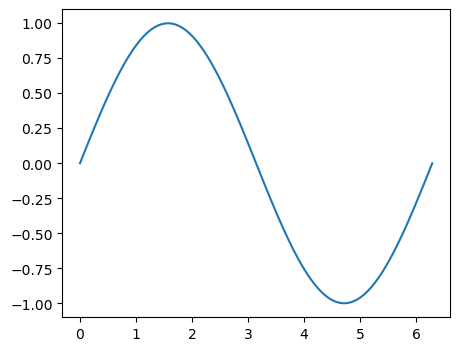

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.plot(x,y)
plt.show()

In [85]:
np.linspace(0, 2, 20).reshape(2,10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [83]:
np.arange(10, 30, 3,dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5. 배열의 차원 변경하기

- reshape([면수,] 행수, 열수) : -1 이 올 수도
- resize([면수,] 행수, 열수)  : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

```
※ 실행결과가 출력되면, 배열이 수정되지 않고, 실행결과가 없으면, 배열 수정됨
```

In [183]:
a = np.random.random((2, 3))
a

array([[0.00590936, 0.64292615, 0.38521698],
       [0.59574189, 0.61080706, 0.59961919]])

In [184]:
a = np.round(a * 10) # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[0., 6., 4.],
       [6., 6., 6.]])

In [185]:
a = a.reshape(3, 2)
a

array([[0., 6.],
       [4., 6.],
       [6., 6.]])

In [186]:
a.reshape(2, -1) # -1 이 주어지면, 해당 차원의 크기가 자동 계산

array([[0., 6., 4.],
       [6., 6., 6.]])

In [187]:
a = a.reshape(-1, 1)
a

array([[0.],
       [6.],
       [4.],
       [6.],
       [6.],
       [6.]])

In [188]:
a.resize((2,3)) # 결과를 출력하지 않는 함수는 배열을 바꿈 (-1불가)

In [189]:
a

array([[0., 6., 4.],
       [6., 6., 6.]])

In [190]:
a.ravel(), a.flatten()

(array([0., 6., 4., 6., 6., 6.]), array([0., 6., 4., 6., 6., 6.]))

In [191]:
a

array([[0., 6., 4.],
       [6., 6., 6.]])

In [192]:
a.T # 전치행렬(행과 열을 뒤바뀐 행렬)

array([[0., 6.],
       [6., 6.],
       [4., 6.]])

In [193]:
a.transpose() # 전치행렬

array([[0., 6.],
       [6., 6.],
       [4., 6.]])

## 2.6 배열 인쇄

In [124]:
# 배열이 커서 출력이 안 될 경우
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [125]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [128]:
# 배열 출력 옵션 변경(인쇄할 사이즈를 10000, 최대치, 무한대)
import sys # 최대치 : sys.maxsize
#np.set_printoptions(threshold=10000)
# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=np.inf)
# 커널 재시작시 threshold 값 복귀

In [127]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작

### 1) 배열의 요소별 연산

In [113]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [114]:
a + b

array([10, 21, 32, 43])

In [115]:
c = a + b
c, c.dtype

(array([10, 21, 32, 43]), dtype('int32'))

In [116]:
a += b # a = a + b
a

array([10, 21, 32, 43], dtype=int8)

In [117]:
a = a + b
a, a.dtype

(array([10, 22, 34, 46]), dtype('int32'))

In [118]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [119]:
a ** b # ** 승연산 a의 b

array([    1,    20,   900, 64000], dtype=int32)

In [120]:
a < 30

array([ True,  True, False, False])

In [123]:
print(a[ [True,  True, False, False] ])
print(a[a<30])


[10 20]
[10 20]


### 2) 행렬(2차원 배열)의 곱(@, dot함수)

cf  * (요소별 곱)

In [137]:
a = np.array([[1,2],[0,1]])
b = np.array([[2,0],[3,4]])

a, b

(array([[1, 2],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [145]:
print("요소별 곱 a*b = ", a*b, sep="\n")
print("행렬곱 a@b = ", a@b, sep="\n")
print("행렬곱 a.dot(b) = ", a.dot(b), sep="\n")

요소별 곱 a*b = 
[[2 0]
 [0 4]]
행렬곱 a@b = 
[[8 8]
 [3 4]]
행렬곱 a.dot(b) = 
[[8 8]
 [3 4]]


In [146]:
a @ b

array([[8, 8],
       [3, 4]])

In [147]:
a * b == b *a
a@b == b@a

array([[False, False],
       [ True, False]])

In [156]:
# n 행 n열의 단위행렬 : np.eye(n) : A@단위행렬=A
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입연산자 사용

- 배열에서는 a = a + b (보다 안전), a += b 다소 다르게 작동


In [167]:
a = np.ones((2, 3),dtype=int) # 2행 3열 int32 배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [168]:
b = np.random.random( (2, 3)) # 2행 3열 float64 배열
b

array([[0.94655582, 0.85719056, 0.68892767],
       [0.00328797, 0.9001035 , 0.91986487]])

In [169]:
# error
a += b # a + b 를 기준 a에 넣는다.

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [170]:
b += a
b

array([[1.94655582, 1.85719056, 1.68892767],
       [1.00328797, 1.9001035 , 1.91986487]])

In [175]:
a = a + b # a + b 를 새로운 변수 a 할당
a

array([[10.73277911, 10.28595279,  9.44463833],
       [ 6.01643984, 10.5005175 , 10.59932435]])

### 4) 배열 요소별 집계

- sum, min, max, mean(평균), var(분산), std(표준편차)

In [194]:
a = np.array([[2, 2, 2, 3], 
              [4, 3, 2, 1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [179]:
print("전체합 : ", np.sum(a), a.sum())
print("전체최소 : ", np.min(a), a.min())
print("전체최대 : ", np.max(a), a.max())
print("전체평균 : ", np.mean(a), a.mean())
print("전체분산 : ", np.var(a), a.var())
print("전체표준편차 : ", np.std(a), a.std())

전체합 :  19 19
전체최소 :  1 1
전체최대 :  4 4
전체평균 :  2.375 2.375
전체분산 :  0.734375 0.734375
전체표준편차 :  0.8569568250501305 0.8569568250501305


### 5) ※ 배열 축별 집계

- sum, min, max, mean(평균), var(분산), std(표준편차), argmax(최대값의 인덱스)

In [202]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [200]:
# 행 - axis : 1
# axis = 1 : 0축을 고정으로 1축(열)들의 합

print('a의 행별 합 : ', a.sum(axis=1), np.sum(a, axis=1))

a의 행별 합 :  [ 9 10] [ 9 10]


In [204]:
# axis = 0 : 1축을 고정으로 0축(행)들의 합
print('a의 열별 합 : ', a.sum(axis=0), np.sum(a, axis=0))

a의 열별 합 :  [6 5 4 4] [6 5 4 4]


In [203]:
print("a의 행별 최대값 위치 : ", a.argmax(axis=1), np.argmax(a, axis=1))

a의 행별 최대값 위치 :  [3 0] [3 0]


In [206]:
# 3차원 배열의 축별 집계
b = np.arange(24).reshape(2,3,4) # 2면 3행 4열
b, b.ndim

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [208]:
# axis = 0 : 1축, 2축은 고정하고, 0축(0면, 1면)들의 합
b.sum(axis=0), np.sum(b, axis=0)

(array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]))

In [209]:
# axis = 1: 0축, 2축 고정하고, 1축(0행, 1행, 2행)들의 합
b.sum(axis=1), np.sum(b, axis=1)

(array([[12, 15, 18, 21],
        [48, 51, 54, 57]]),
 array([[12, 15, 18, 21],
        [48, 51, 54, 57]]))

In [211]:
b.sum(axis=2), np.sum(b, axis=2)

(array([[ 6, 22, 38],
        [54, 70, 86]]),
 array([[ 6, 22, 38],
        [54, 70, 86]]))

## 2.8. 그 외 요소별 계산하는 범용함수들

- 메모리나 시간을 효율적으로 사용할 수 있음
- np.add(A, B, C) = C = np.add(A, B) = C = A + B
- np.subtract(A, B, C) = C = np.subtract(A, B) = C = A - B
- np.multiply(A, B, C) = C = np.multiply(A, B) = C = A * B
- np.sqrt(배열) : 요소별 제곱근 cf. math.sqrt(스칼라값)

In [217]:
%time
a = np.array([1, 2])
b = np.array([3, 4])
c = a+b

CPU times: total: 0 ns
Wall time: 0 ns


In [216]:
c

array([4, 6])

In [218]:
np.add(a, b, c)

array([4, 6])

In [219]:
c = np.add(a, b)
c

array([4, 6])

In [220]:
# np.sqrt(배열 또는 스칼라값), cf. math.sqrt(스칼라)
a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.        , 1.41421356]), 2.0)

In [223]:
import math

math.sqrt(4)
# math.sqrt(a) 스칼라 값이 아니면 error 발생

2.0

## 2.9. 브로드 케이스팅

- pdf page 27.
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해 주는 강력한 기능


In [226]:
# 1차원 배열
a = np.array([1, 2, 3])
b = 10
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [228]:
# 1차원 배열의 브로드캐스팅
a = np.array([1, 2, 3])
b = np.array([10])

print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [230]:
# 2차원 배열의 브로드캐스팅
a = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) # 4행 3열
b = np.array([1, 2,3]) # 3열
a+b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [232]:
# 2차원 배열의 브로드캐스팅
a = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])  # 4행 3열
b = np.array([[1], [2], [3], [4]])  # 4행 1열
a + b

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [249]:
a = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])  # 4행 3열
b = np.array([1, 2, 3, 4])  # 4열 -> (축증가) -> 4행 1열

# 축증가 방법 1.
# b_1 = b.reshape(4, 1)

# ※ 축증가 방법 2 (많이 씀)
b_1 = b[:, np.newaxis]

# 축증가 방법 3
# b_1 = np.expand_dims(b, axis=1)

b_1

array([[1],
       [2],
       [3],
       [4]])

In [252]:
a + b[:, np.newaxis]

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [257]:
# a와 b의 모든 쌍의 조합에 대해 계산하고 싶을 떄
a = np.array([2, 3, 4, 5])
b = np.array([10, 20, 30, 40])

a + b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [258]:
a[:, np.newaxis]+b

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [263]:
print(np.ix_(a, b))
ax, bx = np.ix_(a, b)
ax+bx

(array([[2],
       [3],
       [4],
       [5]]), array([[10, 20, 30, 40]]))


array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

# 3절. 배열 합치기 / 분리하기

- 슬라이싱
- 두배열을 합치는 함수 / 두배열을 분리하는 함수
- r_, c_ 라는 객체
- 두 배열을 분리하는 함수

## 3.1. 인덱싱과 슬라이싱

- 인덱싱에는 없는 인덱스 사용시 에러
- 슬라이싱에는 없는 인덱스 사용시 끝까지
- 음수 인덱는 끝에서부터

In [5]:
a = np.arange(10)*3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [6]:
a[20]

IndexError: index 20 is out of bounds for axis 0 with size 10

In [7]:
a = np.arange(20).reshape(5, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [270]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [279]:
# 모든 행의 마지막 열 앞까지 (모든 행 = 모든 0축의 경우 ':' 나 '...' 을 반드시 명시)
a[:, 0:-1] , a[..., :-1]

(array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]),
 array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]))

In [283]:
# 0 ~ 1 행까지 모든 열 추출 (모든 열 (1축)의 경우 생략 가능 : ':', '...' 사용 가능)
a[0:2, :], a[:2, ...], a[:2]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [284]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [36]:
# 마지막행의 데이터를 2차원으로 변환 > 4행 1열
x = a[4:, ...]
x
# x.reshape(4, 1)

array([[16, 17, 18, 19]])

In [25]:
a[-1],a[-1][:, np.newaxis], a[-1].reshape(4, -1), np.expand_dims(a[-1], axis=1)

(array([16, 17, 18, 19]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]))

## 3.2. 배열을 합치는 함수


- **vstack(tup) : 아래로 추가하는 방식**
- **hstack(tup) : 옆으로 추가하는 방식**
- **dstack(tup) : 마지막 축(열)을 쌓아 합침 (차원증가)**






In [45]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack((a, b))

print("vstack 아래로 합치기", v, v.shape, sep="\n")

h = np.hstack((a, b))
print("hstack 옆으로 합치기", h, h.shape, sep="\n")

d = np.dstack((a, b))
print("dstack 축을 depth로 합치기", d, d.shape, sep="\n")

vstack 아래로 합치기
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [48]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a,b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [49]:
v = np.vstack((a, b))

print("vstack 아래로 합치기", v, v.shape, sep="\n")

h = np.hstack((a, b))
print("hstack 옆으로 합치기", h, h.shape, sep="\n")

d = np.dstack((a, b))
print("dstack 축을 depth로 합치기", d, d.shape, sep="\n")

vstack 아래로 합치기
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)
hstack 옆으로 합치기
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
(3, 8)
dstack 축을 depth로 합치기
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [50]:
np.concatenate((a, b), axis=0)  # = vstack( (a, b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [54]:
np.concatenate((a, b), axis=1)  # = hstack( (a, b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- **column_stack(tup) : 열단위로 합침 == hstack(tup)**
- **row-stack(tup) : 행단위로 합침 == vstack(tup)**
- **stack(tup, axis) : axis 속성에 따라 배열 합침 axis 음수파차원 가능**

In [56]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([7, 8, 9])
np.column_stack((a, b, c))

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [59]:
np.row_stack((a, b, c))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [69]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [93]:
np.stack((a, b), axis=0)  # 0면 a, 1면 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [92]:
np.stack( (a, b), axis=1 )

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [88]:
np.stack( (a, b), axis=-1 )

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3. r_, c_

In [97]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 5, 5, 5])
c = np.array([6, 6, 6, 6])

In [98]:
np.r_[a, b, c]

array([1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6])

In [99]:
np.r_[[a], [b], [c]]

array([[1, 2, 3, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [103]:
np.c_[a, b, c] # 컬럼 쌓기

array([[1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [4, 5, 6]])

## 3.4. 배열을 분리하는 함수

- **vsplit(arr, 정수나 벡터) 첫번쨰 축을 따라 분할**
- **hsplit(arr, 정수나 벡터) 두번쨰 축을 따라 분할**
- **dsplit(arr, 정수나 벡터) depth따라 나눔 (3차원 이상에서만 동작)**
    - 정수 n : n개 분리
    - 벡터 [n] : n번쨰 인덱스 기점으로 분리
    - [m, n] : m번째, n번쨰 인덱스를 기점으로 분리

In [106]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [109]:
a_vsplit = np.vsplit(a, 3) # 2개로 분리는 에러
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [115]:
a_vsplit = np.vsplit(a, [2]) # 2번 인덱스 기점으로 분리
a_vsplit

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [117]:
a_hsplit = np.hsplit(a, 2) # 3개로 분리는 에러
a_hsplit

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [123]:
a_hsplit = np.hsplit(a, [2,3]) # [2,3]:분리될 기준 인덱스
a_hsplit

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

- **split(arr, 갯수나 인덱스벡터, axis)**
    - axis = 0 : vsplit() 동일
    - axis = 1 : hsplit() 동일
    - axis = 2 : 3차원 이상에서만 동작 dsplit() 동일
- **array_split(arr, 갯수나 인덱스벡터, axis)**
    - split과의 차이점은 나눠지지 않은 정수로도 사용 가능

- cf. stack( (a, b), axis = 0 )

In [125]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [128]:
np.split(a, 2, axis=0)  # 행분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [134]:
np.split(a, 2, axis=1)  # 열분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [137]:
# np.split(a, 3, axis=1)  # 3으로 하면 error
np.array_split(a, 3, axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]